In [13]:
import numpy as np
from sympy import *
import scipy.optimize as opt
from sympy.plotting import plot3d
import time
%load_ext memory_profiler
from memory_profiler import profile

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


### Newton, BFGS, SR1

In [9]:
from opts import Newton, BFGS, SR1

In [10]:
x, y = symbols('x y')
rosenbrock = (1-x)**2 + 0.5*(y-x**2)**2
booth = (x+2*y-7)**2 + (2*x+y-5)**2
himm = (x**2 + y - 11)**2 + (x + y**2 - 7)**2

In [11]:
%memit  opt_x, opt_grad, opt_func, steps, elapsed, curv, sing = BFGS(himm, [-1, 2], max_iter=1000, alpha=0.01)
print('optimal x: {} \noptimal grad value: {} \noptimal func value: {:.6f} \n# of iteration: {} \nElapsed time: {:.4f}s \nCurvature condition violated: {} \nSingular matrix occured: {}'.format(\
      opt_x, opt_grad, opt_func, steps, elapsed, curv, sing))

peak memory: 134.89 MiB, increment: 0.00 MiB
optimal x: [-2.80511688  3.13131348] 
optimal grad value: [7.96096942e-05 7.91021176e-05] 
optimal func value: 0.000000 
# of iteration: 1000 
Elapsed time: 0.0549s 
Curvature condition violated: 0 
Singular matrix occured: 0


### L-BFGS-B

In [ ]:
def rosenbrock(x):
    return (1-x[0])**2 + 0.5*(x[1]-x[0]**2)**2
def booth(x):
    return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2
def himm(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [ ]:
opt.minimize(booth, [-10, 10], method='L-BFGS-B')

In [ ]:
%timeit opt.minimize(booth, [-10, 10], method='L-BFGS-B') # check elased time

### Test function plot

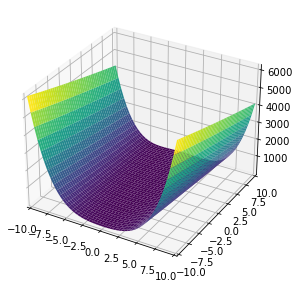

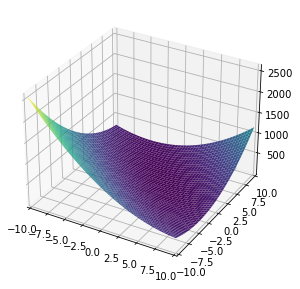

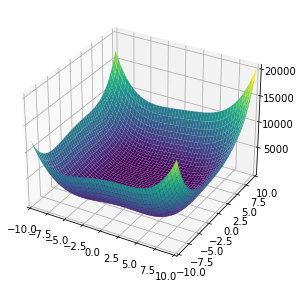

In [12]:
p1 =plot3d(rosenbrock)
p2 = plot3d(booth, cmap="RdYlBu")
p3 = plot3d(himm, cmap="RdYlBu")